In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_excel("C:/Users/Abir/Desktop/IVY- Data Analysis/PwC Power BI Virtual Experience/02 Churn-Dataset.xlsx")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data["SeniorCitizen"]= data.SeniorCitizen.astype(str)

In [5]:
data['SeniorCitizen'].replace({'1':'Yes','0':'No'},inplace=True)

In [6]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"],errors='coerce')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data1= data.copy()

In [9]:
data["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

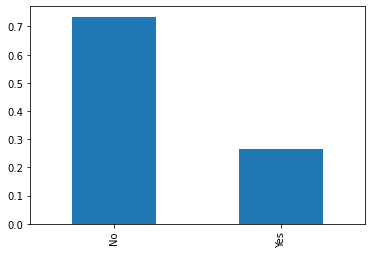

In [10]:
data["Churn"].value_counts(normalize=True).plot.bar()

In [11]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
numAdminTickets      0
numTechTickets       0
Churn                0
dtype: int64

In [12]:
data.dropna(axis=0,inplace=True)

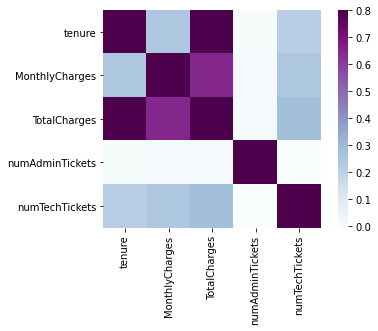

In [13]:
matrix= data.corr() 
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu");

In [14]:
data['tenure'].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [15]:
bins= [0,12,24,36,48,60,72]
group = ['Casual','Recent','Genuine','Long time','Loyal','Very Loyal']
data['Tenure_group']= pd.cut(data['tenure'],bins,labels=group)

In [16]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,Tenure_group
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No,Casual
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,0,0,No,Genuine
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes,Casual
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No,Long time
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes,Casual


In [17]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
labelEncoder.fit(data['Churn'])
data['Churn'] = labelEncoder.transform(data['Churn'])

In [18]:
X= data.drop("Churn",axis=1)
y=data['Churn']

In [19]:
X= X.drop('customerID',axis=1)
X= X.drop('tenure',axis=1)

In [20]:
X=pd.get_dummies(X)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test= train_test_split(X,y, test_size=0.3)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [24]:
model_eval = pd.DataFrame(columns=['Score'])

In [26]:
ran= RandomForestClassifier()
ran.fit(X_train,y_train)
ypred = ran.predict(X_test)

In [27]:
log = LogisticRegression()
log.fit(X_train,y_train)
y_pred2 = log.predict(X_test)

In [28]:
xg =  XGBClassifier()
xg.fit(X_train,y_train)
y_pred3 =  xg.predict(X_test)

[19:17:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [29]:
model_eval.loc['Random Forest','Score'] = accuracy_score(ypred,y_test)
model_eval.loc['Logisitic','Score'] = accuracy_score(y_pred2,y_test)
model_eval.loc['XGBoost','Score'] = accuracy_score(y_pred3,y_test)

In [30]:
model_eval

,Score
Random Forest,0.854502
Logisitic,0.851659
XGBoost,0.853555


In [31]:
ran.feature_importances_

array([0.11510264, 0.14518729, 0.02377964, 0.13171338, 0.01407489,
       0.01436623, 0.01135148, 0.01129764, 0.01214151, 0.01253023,
       0.0099062 , 0.01048225, 0.00295031, 0.00291852, 0.01155932,
       0.00262726, 0.01223833, 0.01018566, 0.02399538, 0.00244108,
       0.02623907, 0.00243159, 0.01185981, 0.01462102, 0.00304046,
       0.0109003 , 0.01562074, 0.0029886 , 0.00938858, 0.0211232 ,
       0.00345447, 0.0094418 , 0.0097001 , 0.00227458, 0.01032212,
       0.01052646, 0.0040299 , 0.0101906 , 0.05708192, 0.00980541,
       0.01457789, 0.01386233, 0.01403737, 0.00923038, 0.01041478,
       0.02928381, 0.00951945, 0.03768628, 0.00843482, 0.00743861,
       0.00577999, 0.00588147, 0.00796284])

In [33]:
weights = pd.DataFrame(ran.feature_importances_,index=X.columns.values)

In [34]:
weights

,0
MonthlyCharges,0.115103
TotalCharges,0.145187
numAdminTickets,0.023780
numTechTickets,0.131713
gender_Female,0.014075
gender_Male,0.014366
SeniorCitizen_No,0.011351
SeniorCitizen_Yes,0.011298
Partner_No,0.012142
Partner_Yes,0.012530


In [35]:
model_eval.reset_index(inplace=True)

In [37]:
pd.DataFrame(model_eval,columns= ['index','Score']).to_csv('ModelScore.csv')

In [43]:
weights.reset_index(inplace=True)

In [44]:
weights

,index,0
0,MonthlyCharges,0.115103
1,TotalCharges,0.145187
2,numAdminTickets,0.023780
3,numTechTickets,0.131713
4,gender_Female,0.014075
5,gender_Male,0.014366
6,SeniorCitizen_No,0.011351
7,SeniorCitizen_Yes,0.011298
8,Partner_No,0.012142
9,Partner_Yes,0.012530


In [46]:
features= pd.DataFrame(weights)

In [49]:
features.shape

(53, 2)

In [52]:
features.rename({'index': 'Features',0:'Value'},axis=1,inplace= True)

In [53]:
features.head()

,Features,Value
0,MonthlyCharges,0.115103
1,TotalCharges,0.145187
2,numAdminTickets,0.023780
3,numTechTickets,0.131713
4,gender_Female,0.014075


In [55]:
feature_Table= features.sort_values('Value',ascending = False)
feature_Table.head()

,Features,Value
1,TotalCharges,0.145187
3,numTechTickets,0.131713
0,MonthlyCharges,0.115103
38,Contract_Month-to-month,0.057082
47,Tenure_group_Casual,0.037686


In [56]:
pd.DataFrame(feature_Table,columns= ['Features','Value']).to_csv('Feature.csv')